# L2 Regularization

In [1]:
!pip install mlxtend==0.17.3

     |████████████████████████████████| 1.3 MB 27.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import os
import datetime
import time
import pytz
import tensorflow as tf
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))
    print('Duration: {:.2f} seconds'.format(time.time() - self.begins))

In [4]:
def plot_result(result):
    # plot loss learning curves
    plt.subplot(211)
    plt.title('Cross-Entropy Loss', pad=-40)
    plt.plot(result.history['loss'], label='train')
    plt.plot(result.history['val_loss'], label='test')
    plt.legend()

    # plot accuracy learning curves
    plt.subplot(212)
    plt.title('Accuracy', pad=-40)
    plt.plot(result.history['accuracy'], label='train')
    plt.plot(result.history['val_accuracy'], label='test')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Generate dataset

In [5]:
# generate 2d classification dataset
x, y = make_moons(n_samples=200, noise=0.3, random_state=1)

# split into train and test sets
n_train = 60
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

## Model without regularization

Training: begins at Thu, 29 Jul 2021 08:49:40
Training: ends at Thu, 29 Jul 2021 08:51:35
Duration: 114.97 seconds
Train: 0.983, Test: 0.886


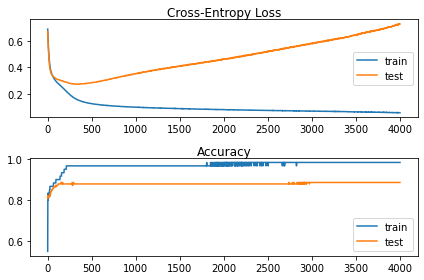

In [8]:
# define model without regularization
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plot_result(history)

## Model with L2 regularization

Training: begins at Thu, 29 Jul 2021 08:53:19
Training: ends at Thu, 29 Jul 2021 08:55:13
Duration: 114.65 seconds
Train: 0.967, Test: 0.893


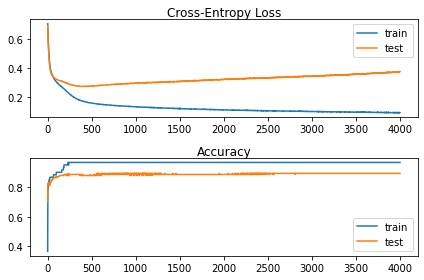

In [10]:
# define model with l2 regularization
model_l2 = Sequential()
model_l2.add(Dense(500, input_dim=2, activation='relu',
                kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid'))
model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history_l2 = model_l2.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback()])

# evaluate the model
_, train_acc = model_l2.evaluate(train_x, train_y, verbose=0)
_, test_acc = model_l2.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plot_result(history_l2)

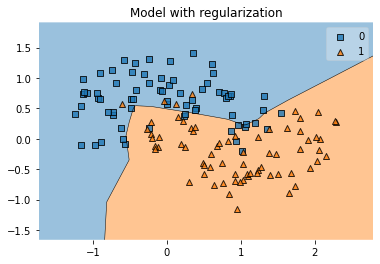

In [11]:
from mlxtend.plotting import plot_decision_regions
# Plot decision boundary
plot_decision_regions(test_x,test_y.squeeze(), clf=model_l2,zoom_factor=2.0)
plt.title("Model with regularization")
plt.show()

 * Try Alternates: update the example to use L1 or the combined L1L2 methods instead of L2 regularization.

 * Report Weight Norm: update the example to
calculate the magnitude of the network
weights and demonstrate that regularization
indeed made the magnitude smaller.

* Regularize Output Layer: update the
example to regularize the output layer of the
model and compare the results.

* Regularize Bias: update the example to
regularize the bias weight and compare the
results.

Training: begins at Thu, 29 Jul 2021 08:56:46
Training: ends at Thu, 29 Jul 2021 08:58:41
Duration: 115.02 seconds
Train: 0.967, Test: 0.886


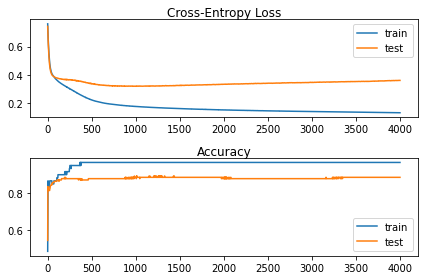

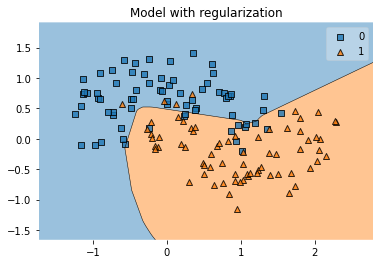

Training: begins at Thu, 29 Jul 2021 08:58:44
Training: ends at Thu, 29 Jul 2021 09:00:39
Duration: 114.43 seconds
Train: 0.967, Test: 0.907


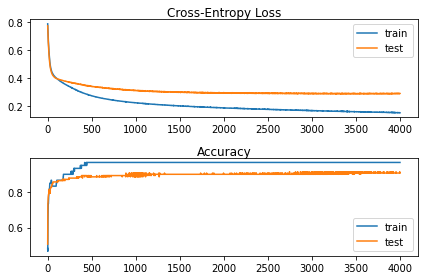

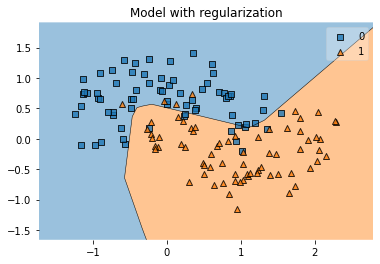

In [12]:
from tensorflow.keras.regularizers import l1, l1_l2

for norm in [l1(0.001), l1_l2(0.001)]:
    # define model
    model_l2 = Sequential()
    model_l2.add(Dense(500, input_dim=2, activation='relu',
                    kernel_regularizer=norm))
    model_l2.add(Dense(1, activation='sigmoid'))
    model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    history_l2 = model_l2.fit(train_x, train_y, 
                        validation_data=(test_x, test_y),
                        epochs=4000, verbose=0,
                        callbacks=[MyCustomCallback()])

    # evaluate the model
    _, train_acc = model_l2.evaluate(train_x, train_y, verbose=0)
    _, test_acc = model_l2.evaluate(test_x, test_y, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    plot_result(history_l2)
    # Plot decision boundary
    plot_decision_regions(test_x,test_y.squeeze(), clf=model_l2,zoom_factor=2.0)
    plt.title("Model with regularization")
    plt.show()